In [3]:
%cd ..

/home/s-uesaka/augment_xgaze


In [4]:
from generate_augmented_dataset import gets_eye_squares
from augment_sample import getsquare
from notebook_utils import get_normalized_image_and_lm, get_augmented_image_and_lm, get_concat_h, draw_lm, draw_horizontal_line
from pathlib import Path
from PIL import Image, ImageDraw
import numpy as np
from generate_augmented_dataset import ImageAugmentor
from utils import get_lm, eye_squares_are_valid
import dlib
from imutils import face_utils
import cv2

In [26]:
import face_alignment
from skimage import io

fa = face_alignment.FaceAlignment(face_alignment.LandmarksType._2D, flip_input=False, device='cuda')

In [36]:
recalculate_lm = False
image_index=237
image, lm = get_normalized_image_and_lm(dataset_dir = Path("/work/jqin/diffusion_iccv/xgaze_512/train"),
                                        subject_number =67,
                                        image_index = image_index,
                                        random_sample=False,
                                        max_image_index=90)

/work/jqin/diffusion_iccv/xgaze_512/train/subject0067.h5
Image Index: 237, Path: /work/jqin/diffusion_iccv/xgaze_512/train/subject0067.h5 CameraIndex: 4


In [37]:
preds = fa.get_landmarks(np.array(image))

In [38]:
preds[0].shape

(68, 2)

In [39]:
lm = preds[0]

(((93, 136), (219, 188)), ((259, 150), (363, 200)))
4


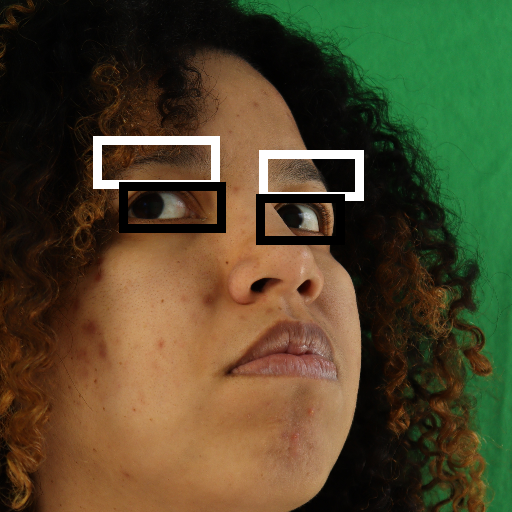

In [40]:
new_eye_squares = gets_eye_squares(preds[0])
old_eye_square = gets_eye_squares(lm)
print(eye_squares)
rect_d = ImageDraw.Draw(image)
rect_d.rectangle(
    eye_squares[0], outline=(255, 255, 255), width=9
)
rect_d.rectangle(
    eye_squares[1], outline=(255, 255, 255), width=9
)
rect_d.rectangle(
    new_eye_squares[0], outline=(0, 0, 0), width=9
)
rect_d.rectangle(
    new_eye_squares[1], outline=(0, 0, 0), width=9
)

print(image_index % 18 + 1)
#draw_lm(image, lm)
image